In [12]:
#setup
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data

In [13]:
# 1.  What does the distrubution of petal length look like?
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


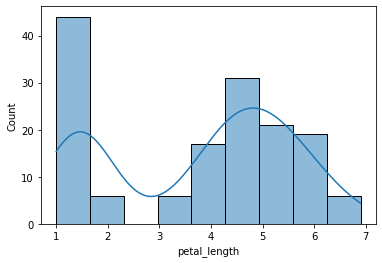

In [14]:
sns.histplot(iris.petal_length, kde=True)
plt.show()

The correlation between petal length and petal width is 0.96


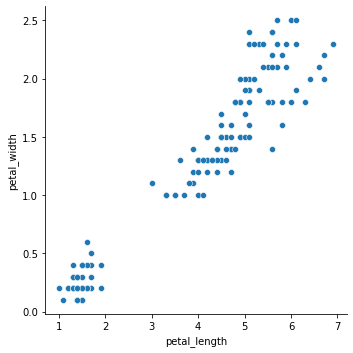

In [15]:
# 2. Is there a correlation between petal length and petal width? 
# Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.
sns.relplot(x='petal_length', y='petal_width', data=iris)
print('The correlation between petal length and petal width is', round(iris.corr().iat[3,2], 2))


The correlation between sepal length and sepal width is -0.12


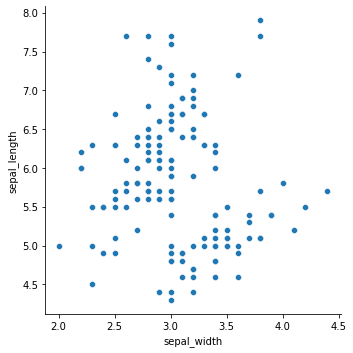

In [16]:
# 3. Would it be reasonable to predict species based on sepal width and sepal length? 
# For this, you'll visualize two numeric columns through the lense of a categorical column.
sns.relplot(x='sepal_width', y='sepal_length', data=iris)
# No, because you have other data avalible and the corrilation is negative.
print('The correlation between sepal length and sepal width is', round(iris.corr().iat[0,1], 2))

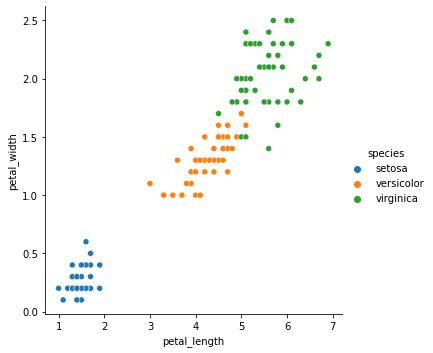

In [17]:
# 4. Which features would be best used to predict species?
sns.relplot(x='petal_length', y='petal_width', hue='species', data=iris)
# Utilizing petal length and width correlation and appling a hue with species will allow you
# to use the length and with of a plant and based on the info determine where it may fit with species.


In [18]:
# 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. 
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [19]:
# Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?
anscombe.groupby('dataset').describe().T


dataset          I         II        III         IV
x count  11.000000  11.000000  11.000000  11.000000
  mean    9.000000   9.000000   9.000000   9.000000
  std     3.316625   3.316625   3.316625   3.316625
  min     4.000000   4.000000   4.000000   8.000000
  25%     6.500000   6.500000   6.500000   8.000000
  50%     9.000000   9.000000   9.000000   8.000000
  75%    11.500000  11.500000  11.500000   8.000000
  max    14.000000  14.000000  14.000000  19.000000
y count  11.000000  11.000000  11.000000  11.000000
  mean    7.500909   7.500909   7.500000   7.500909
  std     2.031568   2.031657   2.030424   2.030579
  min     4.260000   3.100000   5.390000   5.250000
  25%     6.315000   6.695000   6.250000   6.170000
  50%     7.580000   8.140000   7.110000   7.040000
  75%     8.570000   8.950000   7.980000   8.190000
  max    10.840000   9.260000  12.740000  12.500000

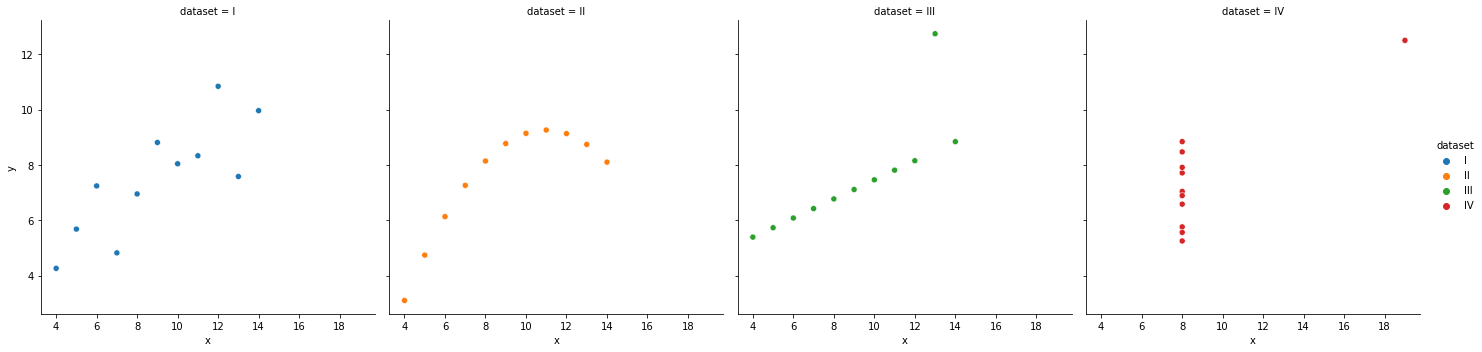

In [20]:
#Plot the x and y values from the anscombe data. Each dataset should be in a separate column.
sns.relplot(x='x', y='y', hue='dataset',col='dataset', data=anscombe)

In [21]:
# 2. Load the InsectSprays dataset and read it's documentation. 
insectsprays = data('InsectSprays')
data('InsectSprays', show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

<AxesSubplot:xlabel='spray', ylabel='count'>

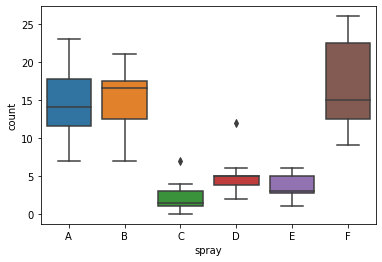

In [24]:
# Create a boxplot that shows the effectiveness of the different insect sprays.
sns.boxplot(x='spray', y='count', data=insectsprays)

In [29]:
# 3. Load the swiss dataset and read it's documentation. 
swiss = data('swiss')
data('swiss', show_doc=True)
# The swiss dataset is available from pydatset rather than seaborn. 
# Create visualizations to answer the following questions:



swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

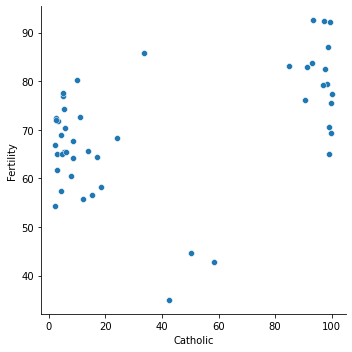

In [34]:
# Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
swiss['is_catholic'] = swiss.Catholic >= 50
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556,0.402813
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859,0.410503
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022,-0.597861
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322,-0.154677
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496,0.961723
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000,0.166081
is_catholic,0.402813,0.410503,-0.597861,-0.154677,0.961723,0.166081,1.000000


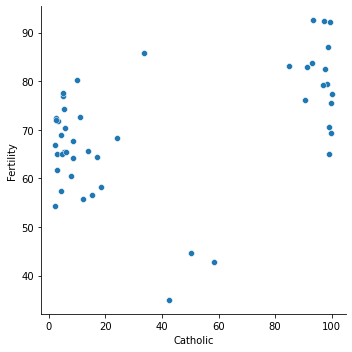

In [36]:
# Does whether or not a province is Catholic influence fertility?
sns.relplot(data=swiss, x='Catholic', y='Fertility')
# No, because there is no correlation between the two.

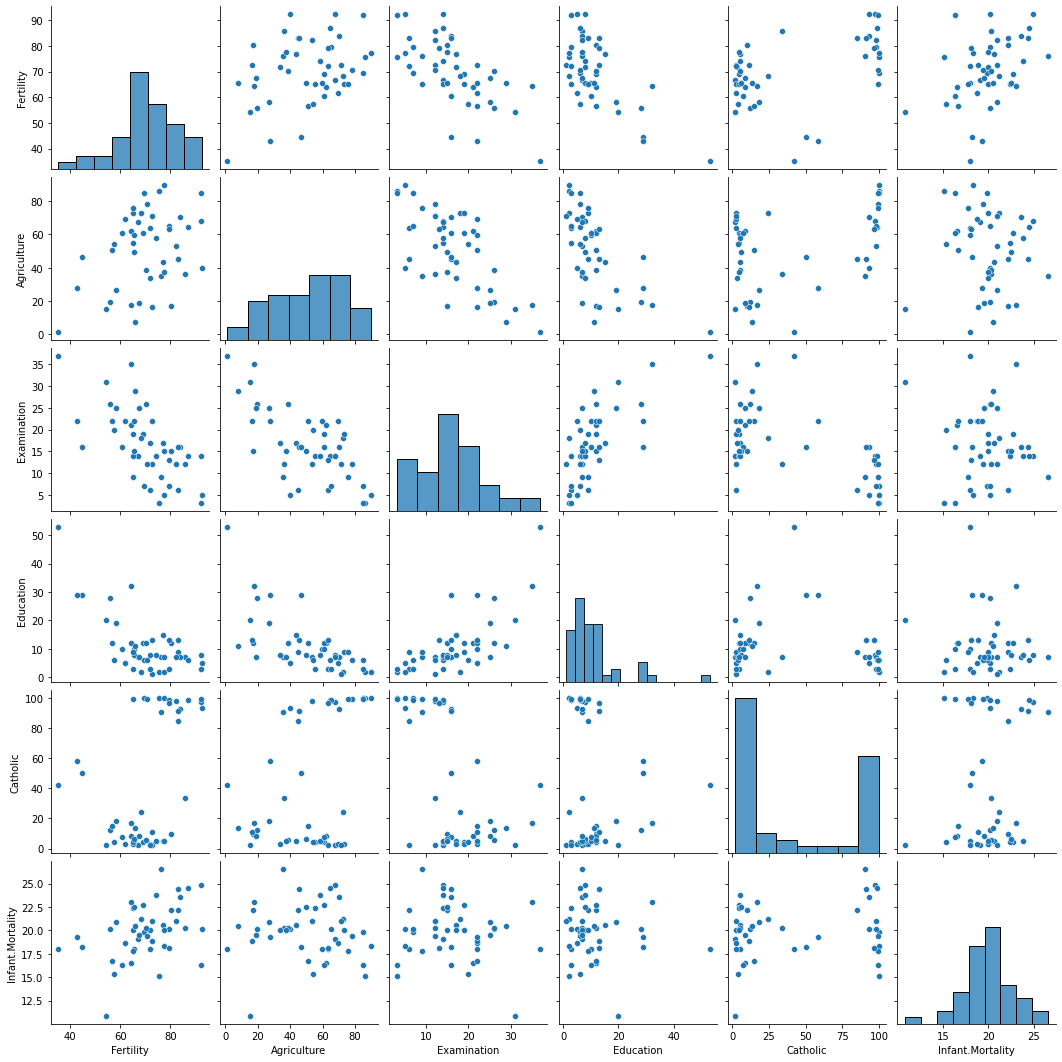

In [76]:
# What measure correlates most strongly with fertility?
#drop is_catholic column
swiss = swiss.drop(columns=['is_catholic'])
sns.pairplot(swiss)

In [55]:
# Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.
from env import get_db_url
chip_url = get_db_url('chipotle')
chipotle = pd.read_sql('SELECT * FROM orders', chip_url)
chipotle['clean_price'] = chipotle.item_price.str.replace('$', '').astype(float)
chipotle.head()

/var/folders/00/hwmfmnz96wxfytp1bbw2qlym0000gn/T/ipykernel_43029/441360726.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipotle['clean_price'] = chipotle.item_price.str.replace('$', '').astype(float)


,id,order_id,quantity,item_name,choice_description,item_price,clean_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39,2.39
1,2,1,1,Izze,[Clementine],$3.39,3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98,16.98


<AxesSubplot:xlabel='item_name'>

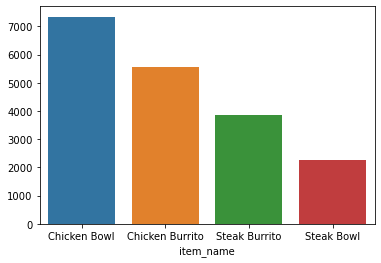

In [71]:
# group by item_name and count the number of orders
chipotle_item_count = chipotle.groupby('item_name').clean_price.sum().sort_values(ascending=False)
chipotle_item_count.head()
# create a bar chart that shows the 4 most popular items and the revenue produced by each
sns.barplot(x=chipotle_item_count.index[:4], y=chipotle_item_count.values[:4])

In [77]:
# Load the sleepstudy data and read it's documentation. 
sleepstudy = data('sleepstudy')
data('sleepstudy', show_doc=True)


sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [87]:
sleepstudy['Subject'] = 'Subject_' + sleepstudy.Subject.astype(str)
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,Subject_308
2,258.7047,1,Subject_308
3,250.8006,2,Subject_308
4,321.4398,3,Subject_308
5,356.8519,4,Subject_308


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

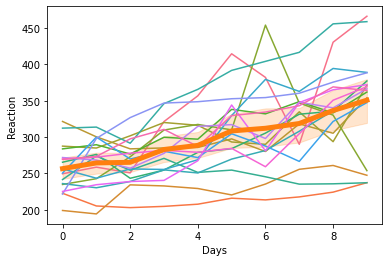

In [107]:
# Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

sns.lineplot(x='Days', y='Reaction', hue='Subject', data=sleepstudy, legend=False)
sns.lineplot(x='Days', y='Reaction', linewidth= 5, estimator='mean', data=sleepstudy, legend=False)

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64